# 9.1 
### R2 Hesaplanması

R-kare değeri negatif olamaz. Negatif bir değer gördüğünüzde, bu genellikle bir hata olduğunu gösterir ve modelinizi, verilerinizi veya hesaplama yönteminizi kontrol etmeniz gerekir.

# 9.2 
## Adjusted R^2

Ayarlanmış R-kare, çoklu regresyon modellerinde modelin karmaşıklığını dikkate alarak, modelin açıklayıcılık gücünü daha doğru bir şekilde değerlendiren bir ölçüdür. R-kare değerinin aksine, gereksiz bağımsız değişkenlerin eklenmesiyle düşer ve bu sayede model seçiminde ve aşırı uyumlanmanın önlenmesinde önemli bir rol oynar.

# 9.3 
## R^2_score

Random Forest R2 Vaule


0.9704434230386582

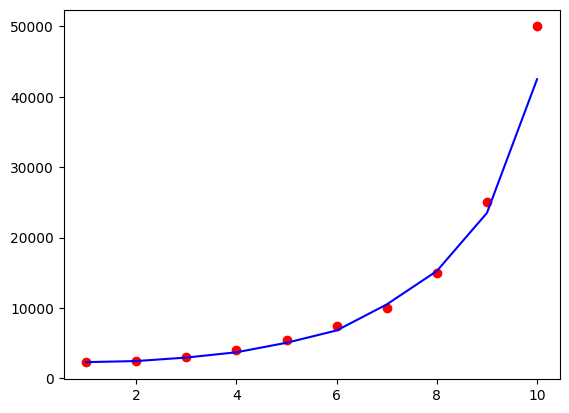

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

data = pd.read_csv('maaslar.csv')

x = data.iloc[:,1:2]
y = data.iloc[:,2:]
X = x.values
Y = y.values

rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)
rf_reg.fit(X,Y.ravel())
rf_reg.predict([[6.6]])

plt.scatter(X,Y,color='red')
plt.plot(x,rf_reg.predict(X), color='blue')

print('Random Forest R2 Vaule')
r2_score(Y, rf_reg.predict(X))

In [ ]:
data.iloc[:,2:].corr()

,UnvanSeviyesi,Kidem,Puan,maas
UnvanSeviyesi,1.000000,-0.125200,0.034948,0.727036
Kidem,-0.125200,1.000000,0.322796,0.117964
Puan,0.034948,0.322796,1.000000,0.201474
maas,0.727036,0.117964,0.201474,1.000000


# 9.4 
## Quiz - 4

#### Quiz - 4

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm


data = pd.read_csv('maaslar_yeni.csv')

x = data.iloc[:,2:5] # 3-4-5 bagımsız
y = data.iloc[:,5:] # 6 bagımlı
X = x.values
Y = y.values

In [61]:
y.head()


,maas
0,2250
1,2500
2,3000
3,4000
4,5500


#### LR

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,Y)

model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.903
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                              83.89
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                    8.38e-14
Time:                        20:02:53   Log-Likelihood:                         -295.74
No. Observations:                  30   AIC:                                      597.5
Df Residuals:                      27   BIC:                                      601.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### PF

In [63]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,Y)

model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(model2.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.680
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.11
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                    7.49e-07
Time:                        20:02:53   Log-Likelihood:                         -317.93
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### SVR

In [64]:
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
x_scale = sc1.fit_transform(X)

sc2 = StandardScaler()
y_scale = sc2.fit_transform(Y)

from sklearn.svm import SVR

svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_scale,y_scale)

model3 = sm.OLS(svr_reg.predict(x_scale),x_scale)
print(model3.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.758
Method:                 Least Squares   F-statistic:                              32.37
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                    4.34e-09
Time:                        20:02:53   Log-Likelihood:                        -0.92453
No. Observations:                  30   AIC:                                      7.849
Df Residuals:                      27   BIC:                                      12.05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\mfurk\Desktop\App\env\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### DT

In [65]:
from sklearn.tree import DecisionTreeRegressor

r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)

model4 = sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.679
Model:                            OLS   Adj. R-squared (uncentered):              0.644
Method:                 Least Squares   F-statistic:                              19.08
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                    7.62e-07
Time:                        20:02:53   Log-Likelihood:                         -317.95
No. Observations:                  30   AIC:                                      641.9
Df Residuals:                      27   BIC:                                      646.1
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### RT

In [66]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators = 10, random_state = 0)

rf_reg.fit(X,Y.ravel())

model5 = sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.713
Model:                            OLS   Adj. R-squared (uncentered):              0.681
Method:                 Least Squares   F-statistic:                              22.31
Date:                Sun, 09 Feb 2025   Prob (F-statistic):                    1.79e-07
Time:                        20:02:53   Log-Likelihood:                         -316.07
No. Observations:                  30   AIC:                                      638.1
Df Residuals:                      27   BIC:                                      642.3
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# 9.8 Summary

Tahmin Modelleri

### LR 



#### Artılar 
Veri boyutunda bağımsız olarak dogrusal ilişki üzerinde kuruludur 

#### Eksileri
Dogrusallık  kabulu aynı zamanda hatadır

### PR

#### Artılar 
Dogrusallık olmayan problmelere adresler

#### Eksileri
Başarı için dogru polinom derecesı onrmlidir

### SVR

#### Artılar 
Dogrusal olmayan modellere çalırsır marjinal degerlere karşı ölçekleme ile dayanıklı olur

#### Eksileri
Ölçekleme önemlidir, anlaşılmalı nispeten karısıktır, dogru kernel fonksiyonu seçimi önemlidir

### DT 


#### Artılar 
Anlaşılabilirdir, ölçeklemeye ihtiyaç duymaz, doğrusal veya doğrusal olmayan problemlerde çalısır

#### Eksileri
Sonuçlar sabitlenmistir küçük veri kümelerinde ezberleme olması yüksek ihtimaldir


### RT 

#### Artılar 
Ölçeklemeye ihtiyaç duymaz, dogrusal olmayan problemlerde çalısır ezber ve sabit sonuc riski düşüktür
#### Eksileri
Çıktıların yorumu ve görsellemesi nispeten